# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: s3://sta9760-project2-datasets/yelp-light/yelp_academic_dataset_business.json (s3://Your_S3_file_location/file_name)

In [1]:
%info

In [2]:
# Current available packages
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
9,application_1588561620230_0010,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas, matplotlib, and seaborn

In [3]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

In [4]:
# Check available pakcages again
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0.3
pip                        20.1
py-dateutil                2.2
pyparsing                  2.4.7
python-dateutil            2.8.1
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
scipy                      1.4.1
seaborn                    0.10.0
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

# Importing

Now, import the installed packages from the previous block below.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

Make sure you have correct file_location and file_name.

In [6]:
df_bus = spark.read.json('s3://sta9760-project2-datasets/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data
Display the number of rows and columns in our dataset.

In [8]:
# get an overview of the dataframe
print(f'Total Columns: {len(df_bus.dtypes)}')
print(f'Total Rows: {df_bus.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393

Display the DataFrame schema below.

In [9]:
# schema
df_bus.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:
* business_id
* name
* city
* state
* categories

In [11]:
df_bus.createOrReplaceTempView("bus")
df_table = spark.sql(
'''
SELECT business_id, name, city, state, stars, categories 
FROM bus 
'''
)

df_table.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as *Active Life*, for instance
* What are the top 20 most popular categories available?


Association Table
We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:

| business_id | categories         
| :-: |:-------------: 
|abcd123| a,b,c


We would like to derive something like:

| business_id | categories         
| :-: |:-------------: 
|abcd123| a
|abcd123| b
|abcd123| c

What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

Display the first 5 rows of your association table below.

In [12]:
# create df that only contains business id and category 
# split category and map business_id multiple times to each of its category

df_cat = spark.sql(
'''
SELECT business_id, EXPLODE(SPLIT(categories,', ')) category 
FROM bus
'''
)

df_cat.createOrReplaceTempView("cat")

df_cat = spark.sql(
'''
SELECT * 
FROM cat
LIMIT 5
''')

df_cat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+

# Total Unique Categories 
Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [13]:
count = spark.sql(
'''
SELECT DISTINCT(category)
FROM cat
''')

count.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

# Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count      
| :-: |:-------------: 
| a | 15
| b | 2
| c | 45

Or something to that effect.

In [14]:
# count category and show the top 20

count_20 = spark.sql(
'''
SELECT category, COUNT(*) AS total
FROM cat
GROUP BY category
ORDER BY total DESC
LIMIT 20''')

count_20.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|total|
+--------------------+-----+
|         Restaurants|63944|
|            Shopping|34644|
|                Food|32991|
|       Home Services|22487|
|       Beauty & Spas|20520|
|    Health & Medical|19227|
|      Local Services|15783|
|          Automotive|14720|
|           Nightlife|14211|
|                Bars|12400|
|Event Planning & ...|11263|
|         Active Life|10225|
|        Coffee & Tea| 8415|
|             Fashion| 8374|
|           Fast Food| 8106|
|          Sandwiches| 8064|
|American (Traditi...| 7596|
|       Home & Garden| 7331|
|         Hair Salons| 7303|
|               Pizza| 7302|
+--------------------+-----+


# Bar Chart of Top Categories
With this data available, let us now build a barchart of the top 20 categories.

**HINT**: don't forget about the matplotlib magic!

    %matplot plt

In [15]:
# Conver to Pandas
count_20pd = count_20.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

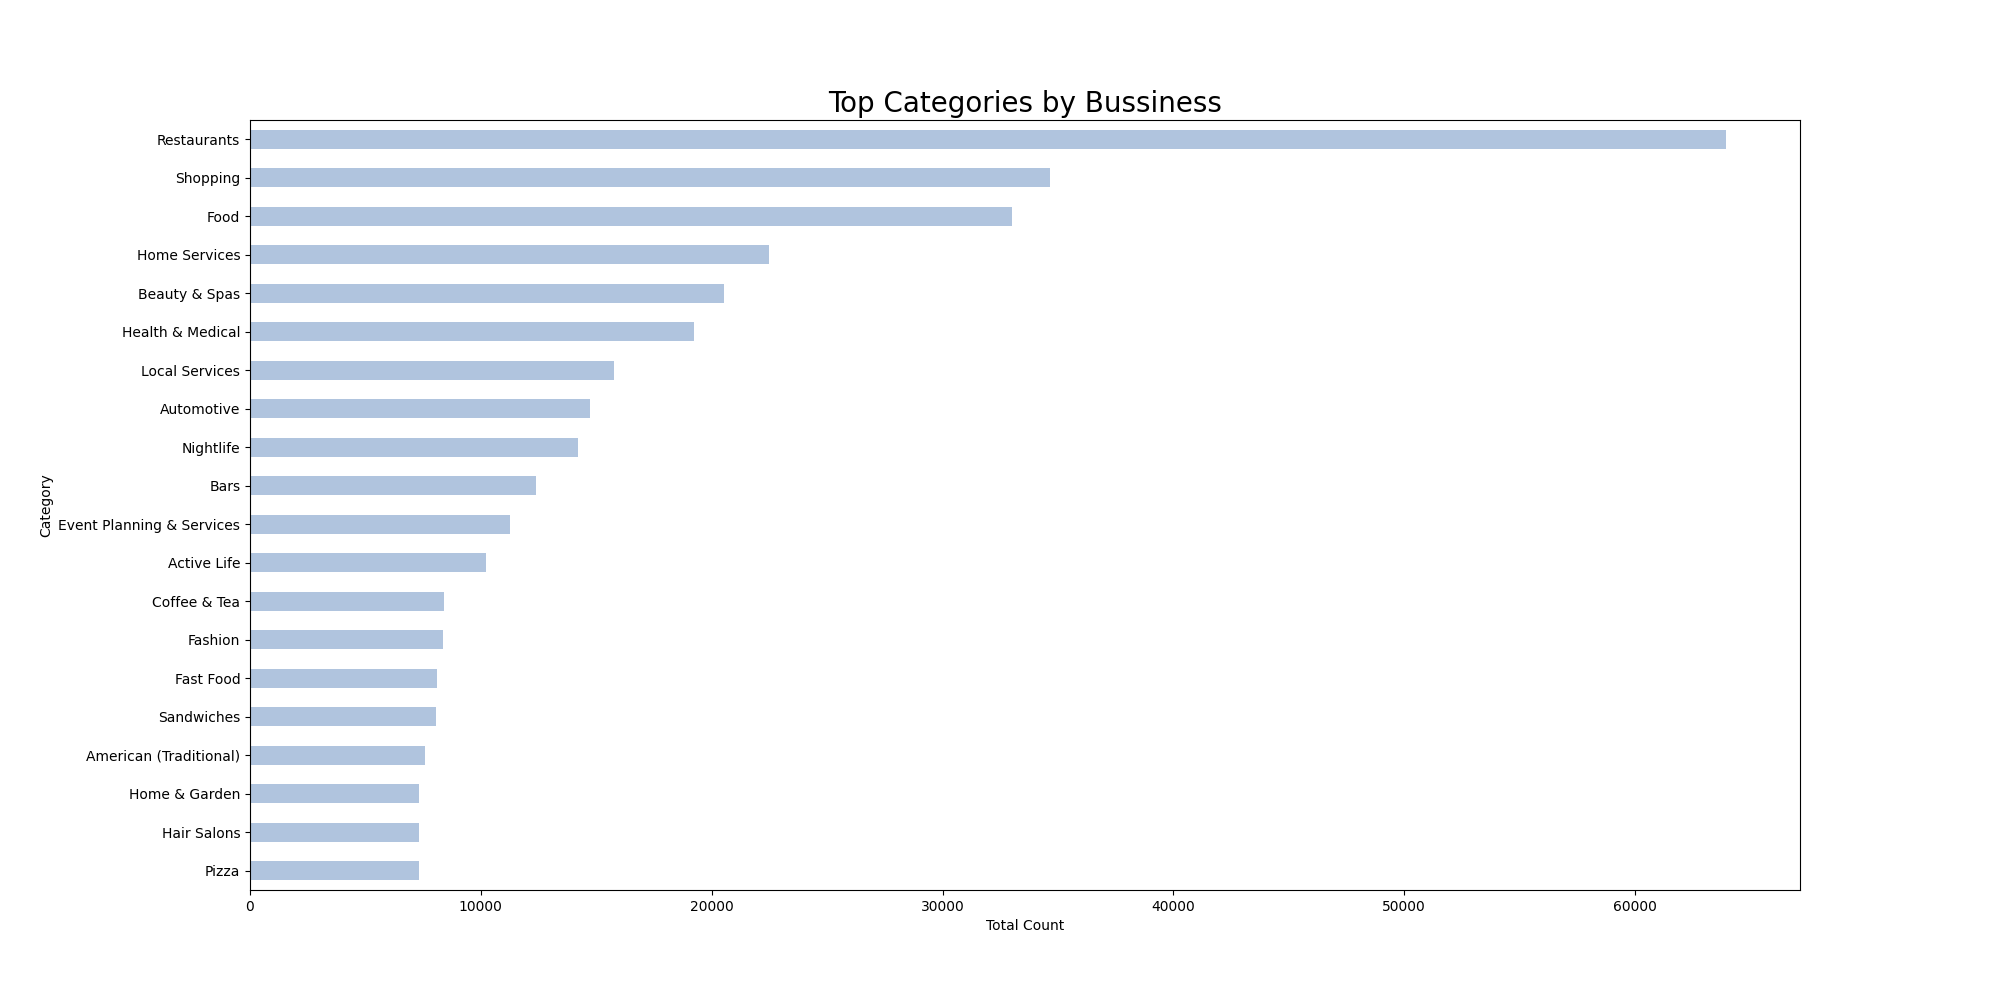

In [16]:
# plot
count_20pd.sort_values(by='total',ascending=True).plot(
x='category',
y='total',
kind='barh',
figsize=(20,10),
legend=None,
color='lightsteelblue')
plt.title('Top Categories by Bussiness', fontsize=20)
plt.xlabel("Total Count")
plt.ylabel("Category")
%matplot plt

# Do Yelp Reviews Skew Negative?# 

Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

# Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.


In [17]:
df_rv = spark.read.json('s3://sta9760-project2-datasets/yelp_academic_dataset_review.json') 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
# schema
df_rv.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [19]:
df_rv.createOrReplaceTempView("review")
df_table2 = spark.sql(
'''
SELECT business_id, stars
FROM review
'''
)

df_table2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who **took the time to submit a written review.**



In [20]:
# calculate the average review stars for each unique business id
avg = spark.sql(
'''
SELECT DISTINCT business_id, AVG(stars) as average_star
FROM review
GROUP BY business_id
'''
)
avg.createOrReplaceTempView("avg")
avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|      average_star|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vQGZjrDiDBuznOkUe...| 4.454545454545454|
|vyu1WGlnHGv2Z2MVE...|               5.0|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

Let's see a few of these:

In [21]:
# joining table using business_id as key
# orbey by reversely
join = spark.sql(
'''
SELECT avg.average_star, bus.stars, bus.name, bus.city, bus.state
FROM avg
INNER JOIN bus ON avg.business_id = bus.business_id
ORDER BY avg.average_star DESC
''')
join.createOrReplaceTempView("joined")
join.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+-----+--------------------+----------+-----+
|average_star|stars|                name|      city|state|
+------------+-----+--------------------+----------+-----+
|         5.0|  5.0|          Mane.edits| Charlotte|   NC|
|         5.0|  5.0|      Thomas S Holly|   Phoenix|   AZ|
|         5.0|  5.0|       The Amburgeys|   Gilbert|   AZ|
|         5.0|  5.0|Jane Bloch - Cold...|Pittsburgh|   PA|
|         5.0|  5.0| Arizona Microgreens|   Phoenix|   AZ|
+------------+-----+--------------------+----------+-----+
only showing top 5 rows


Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

    (row['avg(stars)'] - row['stars']) / row['stars']

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal

In [22]:
# calculate skew
skew = spark.sql(
'''
SELECT (average_star - stars) / stars AS skew
FROM joined
ORDER BY skew ASC
''')
skew.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|                skew|
+--------------------+
|-0.45454545454545453|
| -0.3968253968253968|
|  -0.380952380952381|
| -0.3766233766233767|
|-0.37142857142857144|
| -0.3703703703703704|
| -0.3571428571428571|
|               -0.35|
| -0.3333333333333333|
| -0.3230769230769231|
| -0.3214285714285714|
|               -0.32|
|-0.31428571428571433|
|-0.31428571428571433|
|-0.31428571428571433|
|-0.31428571428571433|
|-0.31428571428571433|
|-0.31428571428571433|
| -0.3137254901960785|
|             -0.3125|
+--------------------+
only showing top 20 rows

In [23]:
# convert to pandas
skew_pd = skew.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

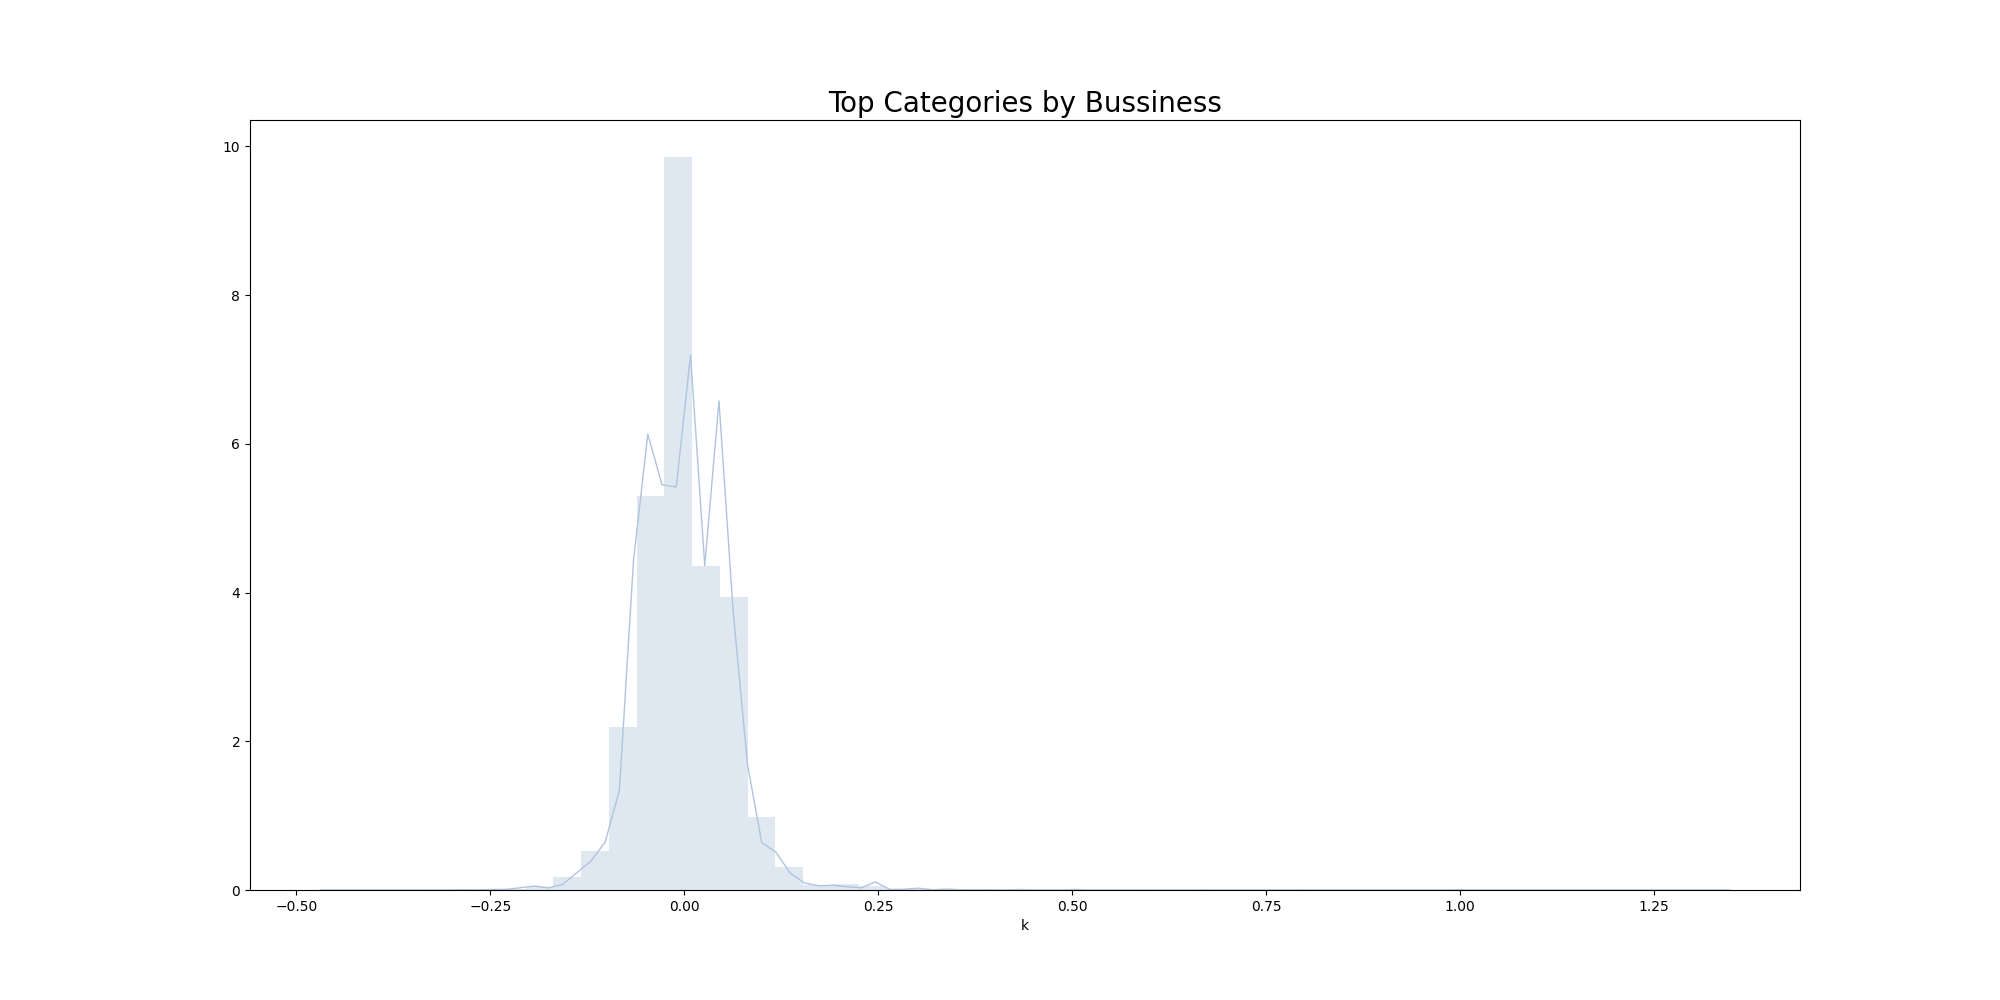

In [24]:
# plot 
plt.figure(figsize=(20,10))
sns.distplot(skew_pd['skew'], 
            hist=True, 
            kde=True, 
            bins=50, 
            color = 'lightsteelblue',
            kde_kws={'linewidth':1})
plt.title('Top Categories by Bussiness', fontsize=20)
plt.xlabel('k')
%matplot plt

# Should the Elite be Trusted? (Or, some other analysis of your choice)


For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the Users dataset and join on either the **business** or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

# Loading Data

Loading user's data

In [25]:
df_user = spark.read.json('s3://sta9760-project2-datasets/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Printing schema to determine what data is available.

In [26]:
# get an overview of dataset and show schema
print(f'Total Columns: {len(df_user.dtypes)}')
print(f'Total Rows: {df_user.count():,}')
df_user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 1,968,703
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [27]:
# show review schema to look for key 
df_rv.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [28]:
# # show business schema to look for key 
df_bus.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [29]:
# create review table
df_rv.createOrReplaceTempView("review")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
# create business table
df_user.createOrReplaceTempView("user")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Testing to see the user data is run

In [31]:
test = spark.sql(
'''
SELECT user_id, average_stars, useful, elite, yelping_since
FROM user
''')
test.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------+--------------------+-------------------+
|             user_id|average_stars|useful|               elite|      yelping_since|
+--------------------+-------------+------+--------------------+-------------------+
|ntlvfPzc8eglqvk92...|         3.57|   628|                    |2007-07-06 03:27:11|
|FOBRPlBHa3WPHFB5q...|         3.84|   790|2008,2009,2010,20...|2008-04-28 01:29:25|
|zZUnPeh2hEp0WydbA...|         3.44|   151|                2010|2008-08-28 23:40:05|
|QaELAmRcDc5TfJEyl...|         3.08|   233|                2009|2008-09-20 00:08:14|
|xvu8G900tezTzbbfq...|         4.37|  1265|2009,2010,2011,20...|2008-08-09 00:30:27|
|z5_82komKV3mI4ASG...|         2.88|   642|                2007|2007-02-27 07:09:40|
|ttumcu6hWshk_EJVW...|          4.0|    29|                    |2010-05-12 16:30:08|
|f4_MRNHvN-yRn7EA8...|         3.63|  4127|2011,2012,2013,20...|2011-01-17 00:18:23|
|UYACF30806j2mfbB5...|         3.75|    68|                    |2

# Comparing Elite's and Non-Elite's Users Average Starts Rating

We want to know how off for users to give stars to stores compared to their overall average starts rating.

We first will split the user groups into Elite and Non-Elite groups.

In [32]:
# split non-elite group from dataset
elite_not = spark.sql(
'''
SELECT  user_id, average_stars
FROM user
WHERE elite LIKE ''
''')
elite_not.show(10)
elite_not.createOrReplaceTempView("elite_not")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|             user_id|average_stars|
+--------------------+-------------+
|ntlvfPzc8eglqvk92...|         3.57|
|ttumcu6hWshk_EJVW...|          4.0|
|UYACF30806j2mfbB5...|         3.75|
|f6YuZP6iennHFVlnF...|          3.8|
|HwPGLzF_uXB3MF8bc...|          4.5|
|y4UuVowA9i3zj2hHy...|         4.17|
|6bbHSJ0PrgSxh7e5n...|         2.21|
|pVU2DdtBFppBAX5G5...|         3.79|
|q6QdLxYENKbVSo29E...|         2.61|
|cWw606W2PmcjTZrwL...|         2.64|
+--------------------+-------------+
only showing top 10 rows

In [33]:
# split elite group from dataset
elite_only = spark.sql(
'''
SELECT user_id, average_stars 
FROM user
WHERE elite NOT LIKE  ''
''')
elite_only.show(10)
elite_only.createOrReplaceTempView("elite_only")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|             user_id|average_stars|
+--------------------+-------------+
|FOBRPlBHa3WPHFB5q...|         3.84|
|zZUnPeh2hEp0WydbA...|         3.44|
|QaELAmRcDc5TfJEyl...|         3.08|
|xvu8G900tezTzbbfq...|         4.37|
|z5_82komKV3mI4ASG...|         2.88|
|f4_MRNHvN-yRn7EA8...|         3.63|
|QG13XBbgHWydzThRB...|          4.1|
|I_6wY8_RsewziNnKh...|         3.63|
|q-v8elVPvKz0KvK69...|         3.37|
|1WBxJ2r3A2QYfRSEz...|         3.82|
+--------------------+-------------+
only showing top 10 rows

# Joining Tables of Business and Review Datasets

We will use non-elite's average stars to copare inidividual review stars base on unique business name.

    [non-elite users' average stars] - [each single reviews stars for unique business name] = difference
    [elite users' average stars] - [each single reviews stars for unique business name] = E_difference

For example, if you average stars is 2.5, but you give a business store for 5.0, you are off by +2.5.

By doing this we have see how off the overall percetange is.

In [35]:
# joining non-elite table using user_id connect to review table
# joining review table using business_id connect to the business table
# return a dataset with the unique business name and its star differences base on non-elite useravg_nonE = spark.sql
avg_nonE = spark.sql(
'''
SELECT DISTINCT bus.name,(elite_not.average_stars - review.stars) AS difference
FROM review
INNER JOIN elite_not ON elite_not.user_id = review.user_id
INNER JOIN bus ON bus.business_id = review.business_id
''')
avg_nonE.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|                name|          difference|
+--------------------+--------------------+
|    The Farish House|-0.41000000000000014|
|       China Poblano|  0.3200000000000003|
|Chaya Japanese Cu...| -0.8700000000000001|
|   Lifetime Eye Care|                -1.0|
|    Top of the World|                2.87|
+--------------------+--------------------+
only showing top 5 rows

In [38]:
# joining elite table using user_id connect to review table
# joining review table using business_id connect to the business table
# return a dataset with the unique business name and its star differences base on elite useravg_nonE = spark.sql
avg_E = spark.sql(
'''
SELECT DISTINCT bus.name, (elite_only.average_stars - review.stars) AS E_difference
FROM review
INNER JOIN elite_only ON elite_only.user_id = review.user_id
INNER JOIN bus ON bus.business_id = review.business_id
''')
avg_E.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+
|                name|       E_difference|
+--------------------+-------------------+
|    Eden's Grill Inn|              -0.79|
| Gordon Ramsay BurGR|              -0.79|
|              Satara|0.20999999999999996|
|            Javier's| 0.9199999999999999|
|Citizens Kitchen ...|               2.45|
+--------------------+-------------------+
only showing top 5 rows

Convert to Pandas

In [39]:
avg_nonE_pd = avg_nonE.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
avg_E_pd = avg_E.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

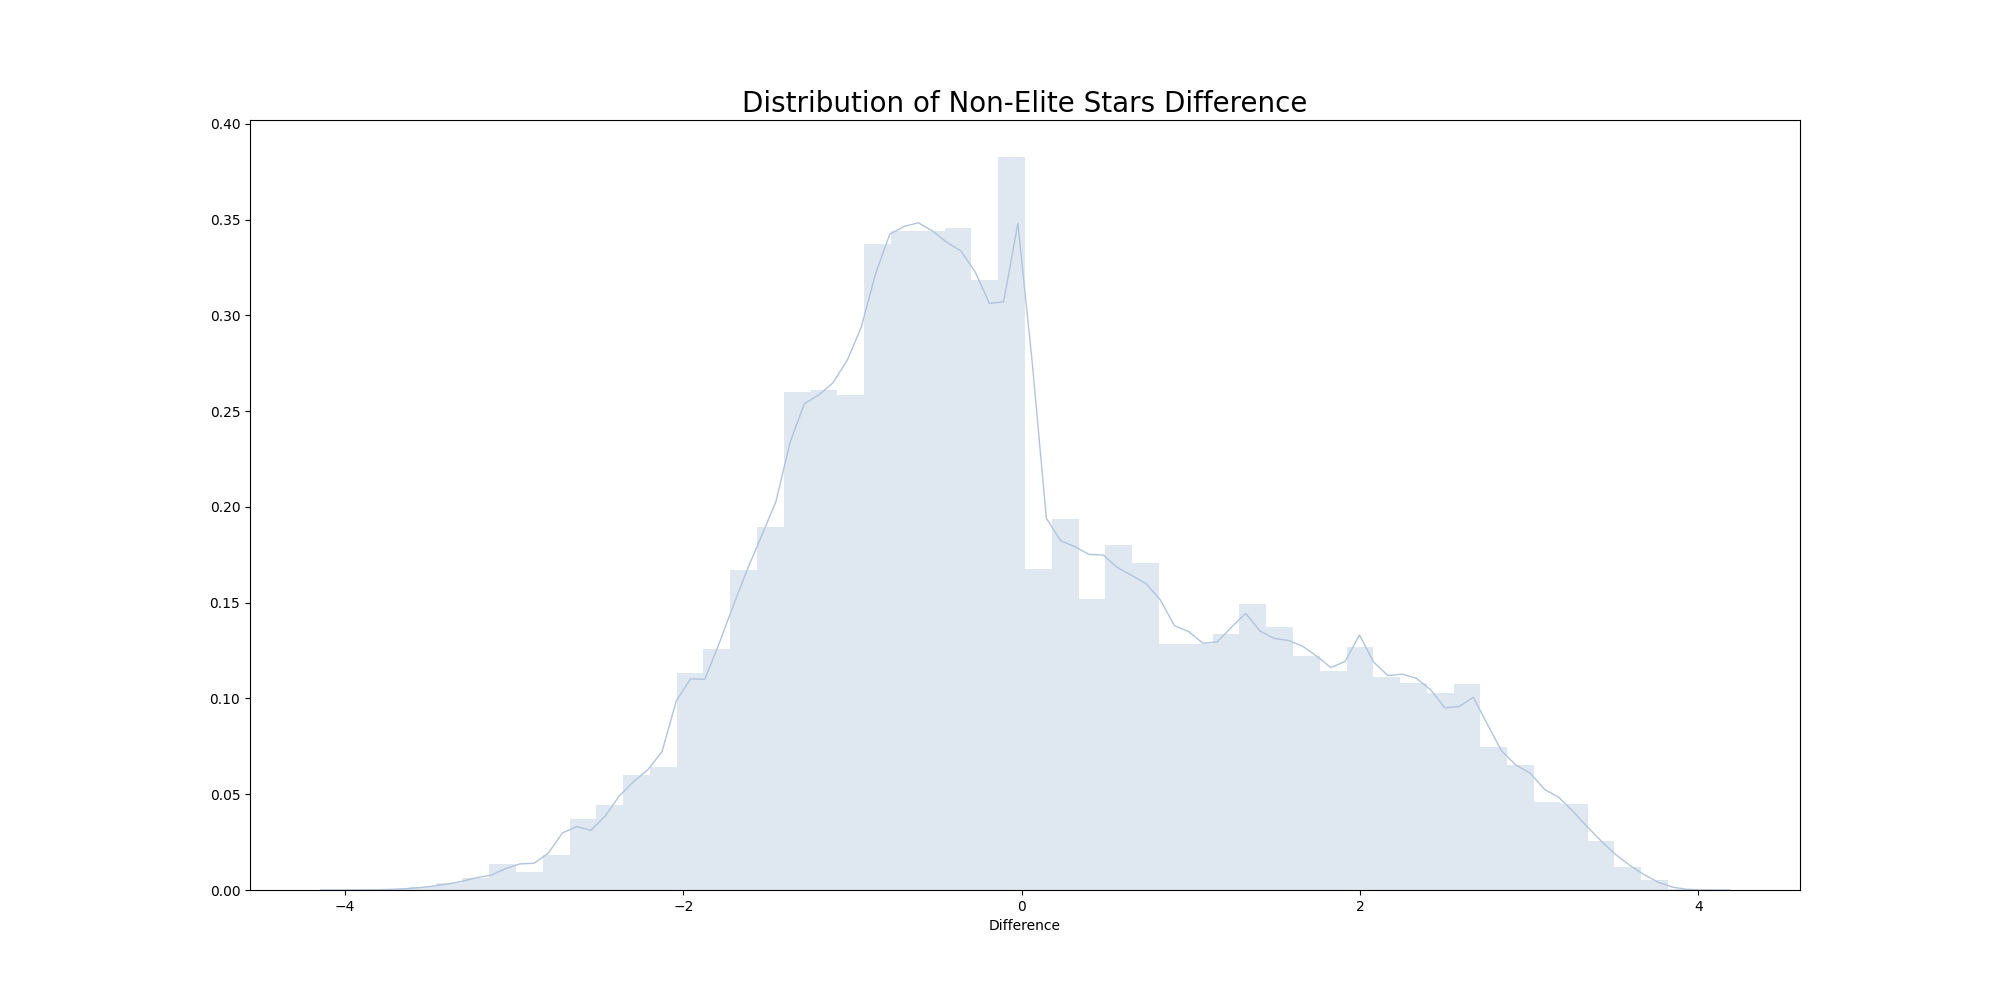

In [41]:
# non-elite user plot
plt.figure(figsize=(20,10))
sns.distplot(avg_nonE_pd['difference'], 
            hist=True, 
            kde=True, 
            bins=50, 
            color = 'lightsteelblue',
            kde_kws={'linewidth':1})
plt.title('Distribution of Non-Elite Stars Difference', fontsize=20)
plt.xlabel('Difference')
%matplot notebook
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

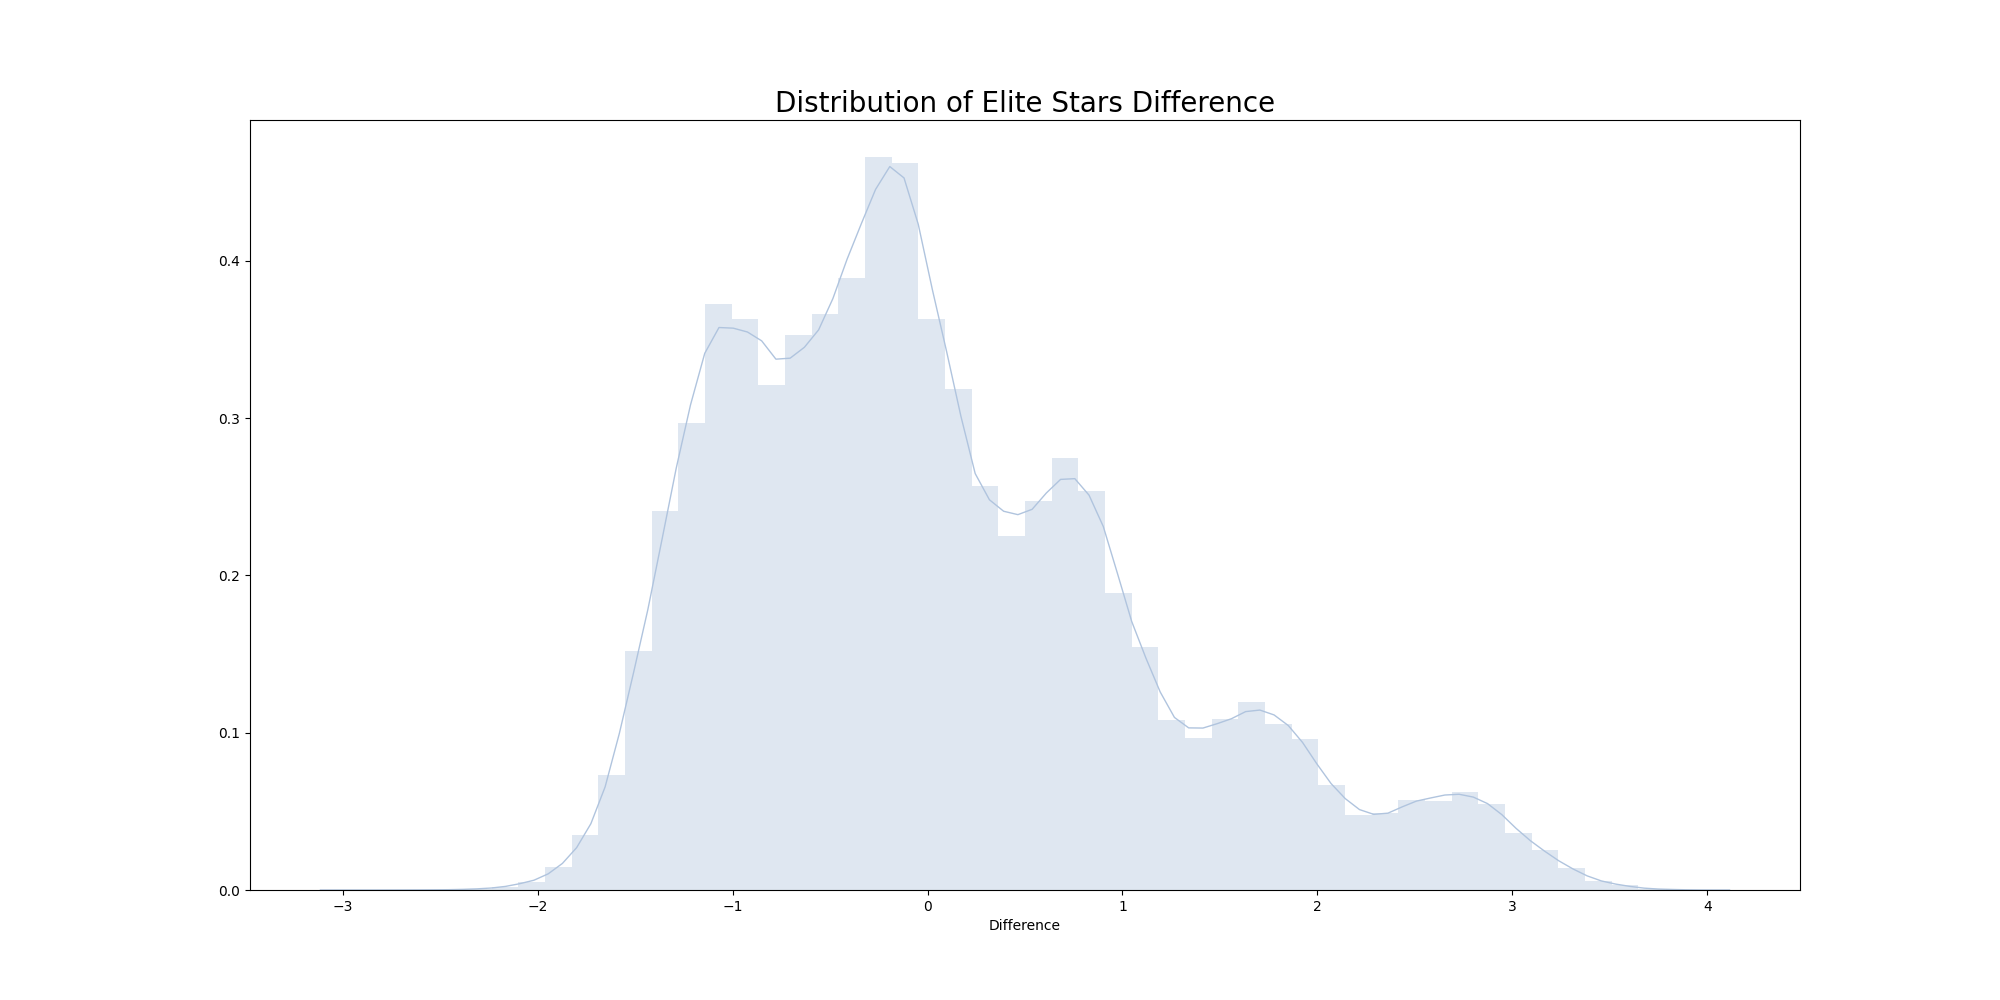

In [42]:
# elite user plot
plt.figure(figsize=(20,10))
sns.distplot(avg_E_pd['E_difference'], 
            hist=True, 
            kde=True, 
            bins=50, 
            color = 'lightsteelblue',
            kde_kws={'linewidth':1})
plt.title('Distribution of Elite Stars Difference', fontsize=20)
plt.xlabel('Difference')
%matplot notebook
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

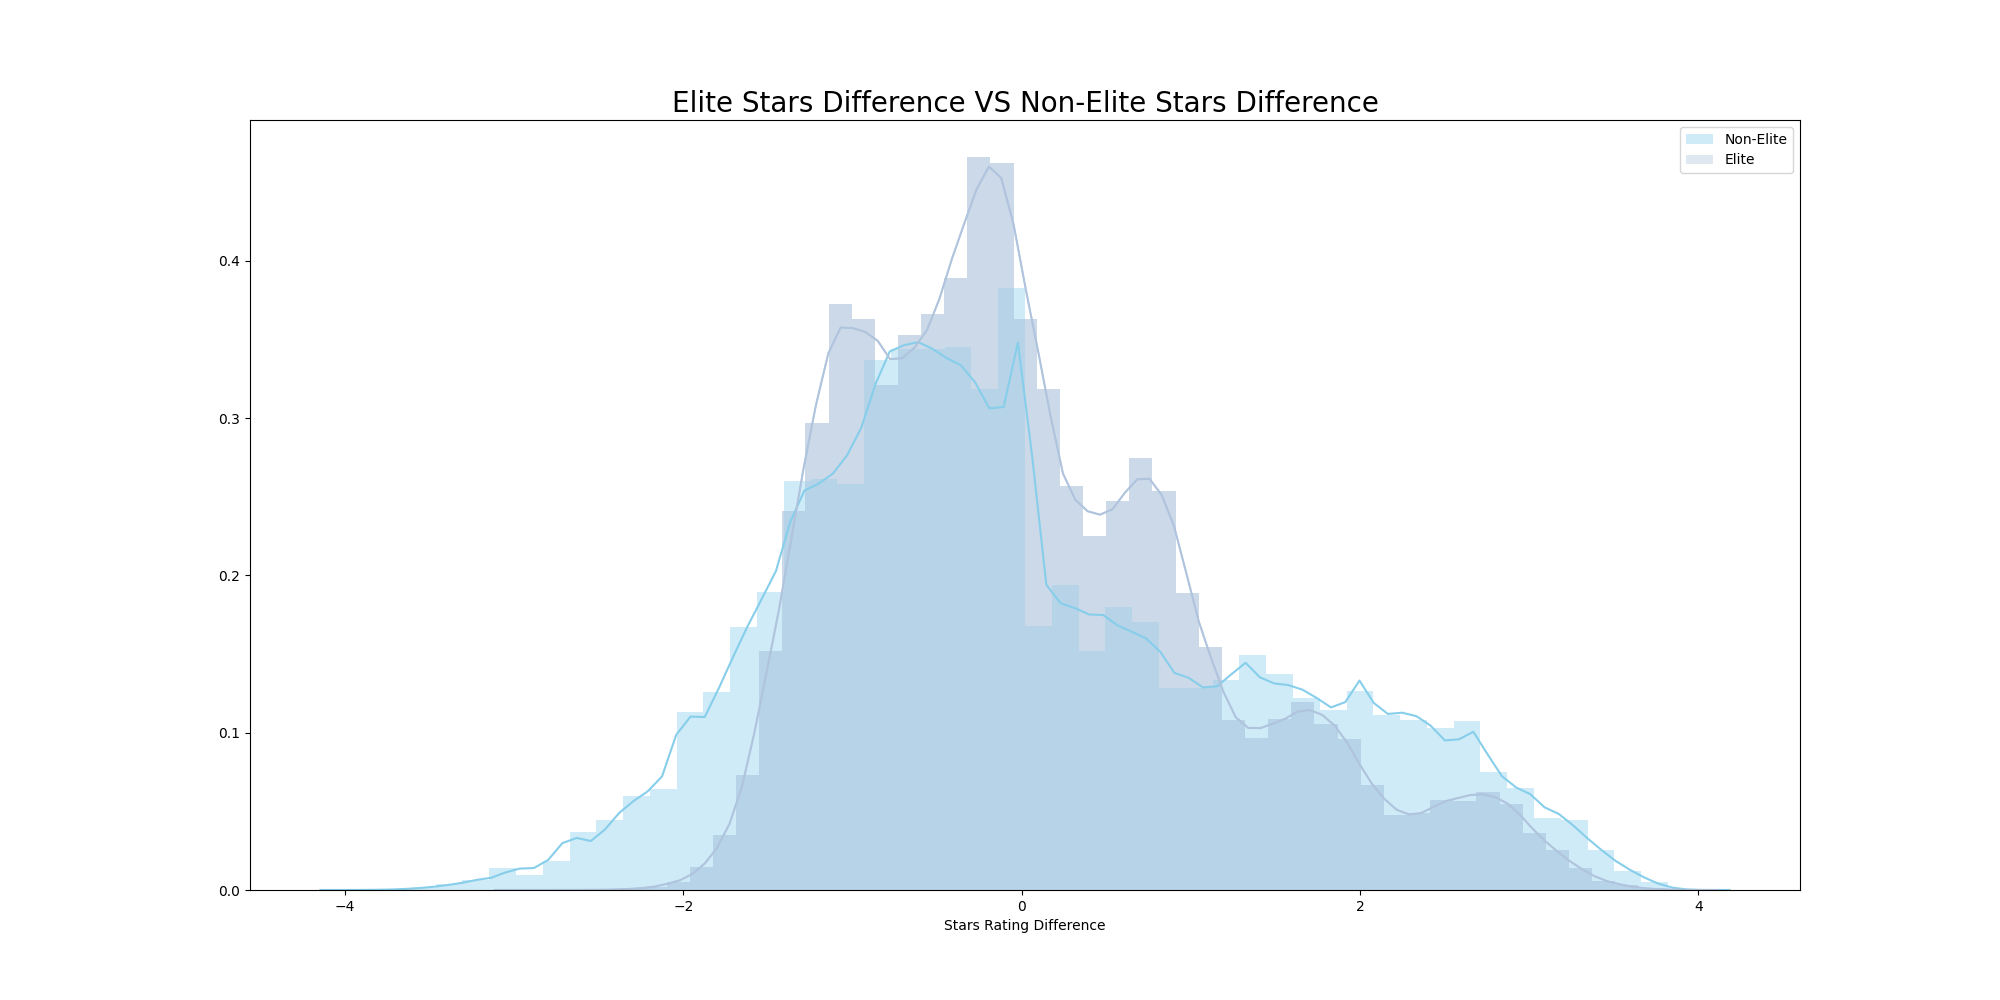

In [43]:
# overlapping to make the comparison
sns.distplot(avg_nonE_pd['difference'], color='skyblue', label="Non-Elite")
sns.distplot(avg_E_pd['E_difference'], color='lightsteelblue', label="Elite")
plt.title('Elite Stars Difference VS Non-Elite Stars Difference', fontsize=20)
plt.xlabel('Stars Rating Difference')
plt.legend(loc='upper right')
%matplot plt

# Conclusion 

By percentage, non-elite users tend to give higher stars compare to the elite user. Elite users tend to be more cautious while giving stars to a business store in both positive and negative ways. 

If the difference is not huge, we should see data points are close to the 0, that means elite users won't have high fluctuation in giving stars. However, non-elite users seem to be having higher fluctuation, which we can see that both positive and negative ways the difference is huge. Overall, base on current distribution, we can trust the elite users, but we need further analysis to confirm this conclusion is correct.